# **Balance de clases**

### **Carga de datos pre-tratados**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [1]:
import urllib.request
import pickle

x = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/basic/train-preprocessed.p").read()
    )
y = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/basic/test-preprocessed.p").read()
    )

In [2]:
def muestras_por_clases (Y):
    """Función que calcula el número de muestras por cada clase
    Y: vector de numpy con las etiquetas de las muestras del conjunto X
    retorna: diccionario [int/float:int/float]
        con la estructura:{etiquetaclase1: número de muestras clase1, etiquetaclase2: número de muestras clase2}
    """
    dicto = dict(zip(np.unique(Y,return_counts=True)[0], np.unique(Y,return_counts=True)[1]))
    return (dicto)

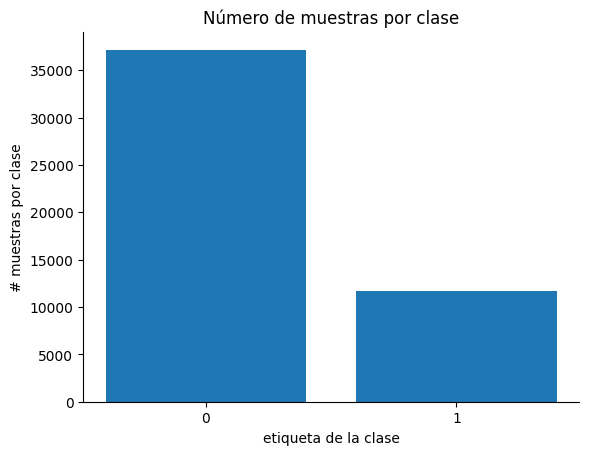

In [4]:
fig, ax = plt.subplots()
ax.bar(muestras_por_clases(y).keys(), muestras_por_clases(y).values())
ax.set_title("Número de muestras por clase")
ax.set_xlabel("etiqueta de la clase")
ax.set_ylabel("# muestras por clase")
ax.set_xticks(list(muestras_por_clases(y).keys()))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [5]:
m = tuple(muestras_por_clases(y).values())
print(m)
print(f"El {(m[0]* 100 / (m[0] + m[1])):.2f}% de los datos son de la clase mayoritaria")

(37155, 11687)
El 76.07% de los datos son de la clase mayoritaria


Podemos observar que existe un desbalance considerable en el número de muestras que corresponden a cada clase (el 76% de los datos corresponden a las muestras de personas cuyos ingresos no superan los 50 mil dólares anuales).

A continuación, se aplicó una combinación de oversampling y undersampling con el objetivo de obtener un dataset con las clases totalmente balanceadas.

Específicamente, la mitad de la diferencia entre la clase mayoritaria y la minoritaria se eliminaron, y la otra mitad fue generada artificialmente.

In [11]:
y = y.astype("int")

In [12]:
sampling_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.6)),
    ('undersample', RandomUnderSampler(sampling_strategy=1.0))
])

x, y = sampling_pipeline.fit_resample(x, y)

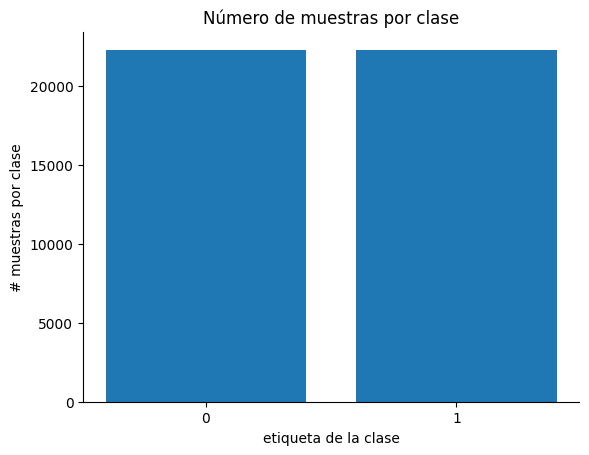

In [13]:
fig, ax = plt.subplots()
ax.bar(muestras_por_clases(y).keys(), muestras_por_clases(y).values())
ax.set_title("Número de muestras por clase")
ax.set_xlabel("etiqueta de la clase")
ax.set_ylabel("# muestras por clase")
ax.set_xticks(list(muestras_por_clases(y).keys()))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [14]:
muestras_por_clases(y).values()

dict_values([22293, 22293])

In [15]:
y.shape

(44586, 1)

## **Exportación de datos tratados**

In [16]:
x.to_pickle("./train-preprocessed.p")
y.to_pickle("./test-preprocessed.p")